In [1]:
import os
import pandas as pd
from pathlib import Path

In [8]:
task = "neuro_shv_random"

task_dir = Path("/lustre/groups/ml01/workspace/eirini/pipeline/data/reports") / task

if not task_dir.exists():
    raise FileNotFoundError(f"No such directory: {task_dir}")

# 🔍 Step 1: Collect all accuracy.tsv files from model/featsel/hash/accuracy.tsv
accuracy_files = []

for model_dir in task_dir.iterdir():
    if model_dir.is_dir():
        for featsel_dir in model_dir.iterdir():
            if featsel_dir.is_dir():
                for hash_dir in featsel_dir.iterdir():
                    if hash_dir.is_dir():
                        acc_path = hash_dir / "accuracy.tsv"
                        if acc_path.exists() and acc_path.stat().st_size > 0:
                            accuracy_files.append(acc_path)

print(f"Found {len(accuracy_files)} accuracy.tsv files.")
accuracy_files[:3]


Found 390 accuracy.tsv files.


[PosixPath('/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro_shv_random/xgboost/svd_graph/68ab764e17/accuracy.tsv'),
 PosixPath('/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro_shv_random/xgboost/svd_graph/8f9bbfe975/accuracy.tsv'),
 PosixPath('/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro_shv_random/xgboost/svd_graph/45b6dbbff4/accuracy.tsv')]

In [9]:
if accuracy_files:
    sample_df = pd.read_csv(accuracy_files[0], sep='\t')
    display(sample_df.head())
else:
    print("No accuracy files found.")


,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,0.519438,0.396611,-0.020798,0.940483,0.859837,neuro_shv_random,xgboost,svd_graph,"{'alpha': 25, 'lambda': 75, 'max_depth': 5, 'l...",68ab764e17


In [10]:
dfs = []

for f in accuracy_files:
    try:
        df = pd.read_csv(f, sep='\t')
        dfs.append(df)
    except Exception as e:
        print(f"⚠️ Could not read {f}: {e}")

if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)
    display(merged_df.head())
    print(f"✅ Merged {len(dfs)} files into shape {merged_df.shape}")
else:
    print("No data to merge.")


,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,0.519438,0.396611,-0.020798,0.940483,0.859837,neuro_shv_random,xgboost,svd_graph,"{'alpha': 25, 'lambda': 75, 'max_depth': 5, 'l...",68ab764e17
1,0.520986,0.398701,-0.028532,0.940202,0.858902,neuro_shv_random,xgboost,svd_graph,"{'alpha': 15, 'lambda': 40, 'max_depth': 5, 'l...",8f9bbfe975
2,0.515116,0.393409,-0.004465,0.941483,0.862397,neuro_shv_random,xgboost,svd_graph,"{'alpha': 50, 'lambda': 90, 'max_depth': 3, 'l...",45b6dbbff4
3,0.514453,0.395066,-0.006293,0.941816,0.862619,neuro_shv_random,xgboost,svd_graph,"{'alpha': 10, 'lambda': 50, 'max_depth': 5, 'l...",863718d16e
4,0.535442,0.413418,-0.094420,0.937066,0.850702,neuro_shv_random,xgboost,svd_graph,"{'alpha': 0, 'lambda': 0, 'max_depth': 4, 'lea...",ef8a93bac0


✅ Merged 390 files into shape (390, 10)


In [12]:
# 📝 Optional Step 4: Save the merged result
output_path = task_dir / "merged_results.tsv"
output_path
merged_df.to_csv(output_path, sep='\t', index=False)
print(f"✅ Saved merged results to {output_path}")


✅ Saved merged results to /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro_shv_random/merged_results.tsv


In [21]:
merged_df

,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,0.519438,0.396611,-0.020798,0.940483,0.859837,neuro_shv_random,xgboost,svd_graph,"{'alpha': 25, 'lambda': 75, 'max_depth': 5, 'l...",68ab764e17
1,0.520986,0.398701,-0.028532,0.940202,0.858902,neuro_shv_random,xgboost,svd_graph,"{'alpha': 15, 'lambda': 40, 'max_depth': 5, 'l...",8f9bbfe975
2,0.515116,0.393409,-0.004465,0.941483,0.862397,neuro_shv_random,xgboost,svd_graph,"{'alpha': 50, 'lambda': 90, 'max_depth': 3, 'l...",45b6dbbff4
3,0.514453,0.395066,-0.006293,0.941816,0.862619,neuro_shv_random,xgboost,svd_graph,"{'alpha': 10, 'lambda': 50, 'max_depth': 5, 'l...",863718d16e
4,0.535442,0.413418,-0.094420,0.937066,0.850702,neuro_shv_random,xgboost,svd_graph,"{'alpha': 0, 'lambda': 0, 'max_depth': 4, 'lea...",ef8a93bac0
...,...,...,...,...,...,...,...,...,...,...
385,0.645967,0.498700,0.029110,0.910079,0.854989,neuro_shv_random,linear,hvg_svd,{'parm': 0},3b375cc7a9
386,0.647581,0.499221,0.024000,0.909619,0.854437,neuro_shv_random,linear,hvg_svd_graph,{'parm': 0},195be97348
387,0.519341,0.399335,-0.025274,0.940670,0.861141,neuro_shv_random,linear,svd,{'parm': 0},008f20b0f6
388,0.691630,0.532266,-0.836488,0.898471,0.793942,neuro_shv_random,linear,hvg_nomsi,{'parm': 0},61b6e2244d


Find best

In [29]:
df

,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,0.519438,0.396611,-0.020798,0.940483,0.859837,neuro_shv_random,xgboost,svd_graph,"{'alpha': 25, 'lambda': 75, 'max_depth': 5, 'l...",68ab764e17
1,0.520986,0.398701,-0.028532,0.940202,0.858902,neuro_shv_random,xgboost,svd_graph,"{'alpha': 15, 'lambda': 40, 'max_depth': 5, 'l...",8f9bbfe975
2,0.515116,0.393409,-0.004465,0.941483,0.862397,neuro_shv_random,xgboost,svd_graph,"{'alpha': 50, 'lambda': 90, 'max_depth': 3, 'l...",45b6dbbff4
3,0.514453,0.395066,-0.006293,0.941816,0.862619,neuro_shv_random,xgboost,svd_graph,"{'alpha': 10, 'lambda': 50, 'max_depth': 5, 'l...",863718d16e
4,0.535442,0.413418,-0.094420,0.937066,0.850702,neuro_shv_random,xgboost,svd_graph,"{'alpha': 0, 'lambda': 0, 'max_depth': 4, 'lea...",ef8a93bac0
...,...,...,...,...,...,...,...,...,...,...
385,0.645967,0.498700,0.029110,0.910079,0.854989,neuro_shv_random,linear,hvg_svd,{'parm': 0},3b375cc7a9
386,0.647581,0.499221,0.024000,0.909619,0.854437,neuro_shv_random,linear,hvg_svd_graph,{'parm': 0},195be97348
387,0.519341,0.399335,-0.025274,0.940670,0.861141,neuro_shv_random,linear,svd,{'parm': 0},008f20b0f6
388,0.691630,0.532266,-0.836488,0.898471,0.793942,neuro_shv_random,linear,hvg_nomsi,{'parm': 0},61b6e2244d


In [31]:
task

'neuro_shv_random'

In [32]:
# -- Per-model Best Selection --
per_model_rmse_rows = []
per_model_r2_rows = []
grouped = df.groupby(['method_name', 'task'])

for (method_name, task), group in grouped:
    if 'rmse' in group.columns:
        # For RMSE, lower values are better
        best_row_rmse = group.loc[group['rmse'].idxmin()]
        per_model_rmse_rows.append(best_row_rmse)
    if 'r2' in group.columns:
        # For R², higher values are better
        best_row_r2 = group.loc[group['r2'].idxmax()]
        per_model_r2_rows.append(best_row_r2)

best_per_model_rmse_df = pd.DataFrame(per_model_rmse_rows).drop_duplicates()
best_per_model_r2_df = pd.DataFrame(per_model_r2_rows).drop_duplicates()
best_per_model_rmse_df = best_per_model_rmse_df.sort_values(by='rmse', ascending=True)
best_per_model_r2_df = best_per_model_r2_df.sort_values(by='r2', ascending=False)

# -- Overall Top 10 Selection --
best_overall_rmse_df = df.sort_values(by='rmse', ascending=True).head(10)
best_overall_r2_df = df.sort_values(by='r2', ascending=False).head(10)

best_per_model_rmse_df.to_csv(task_dir / "best_results_per_model_rmse.tsv", sep='\t', index=False)
best_per_model_r2_df.to_csv(task_dir / "best_results_per_model_r2.tsv", sep='\t', index=False)
best_overall_rmse_df.to_csv(task_dir / "best_results_overall_rmse.tsv", sep='\t', index=False)
best_overall_r2_df.to_csv(task_dir / "best_results_overall_r2.tsv", sep='\t', index=False)


Visualize

In [18]:
import matplotlib.pyplot as plt
from pathlib import Path


In [26]:
df = merged_df
filename = f"metrics_visualisation_{task}.png"
full_path = task_dir / filename


In [27]:
full_path

PosixPath('/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro_shv_random/metrics_visualisation_neuro_shv_random.png')

Saved plot for neuro_shv_random: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro_shv_random/metrics_visualisation_neuro_shv_random.png


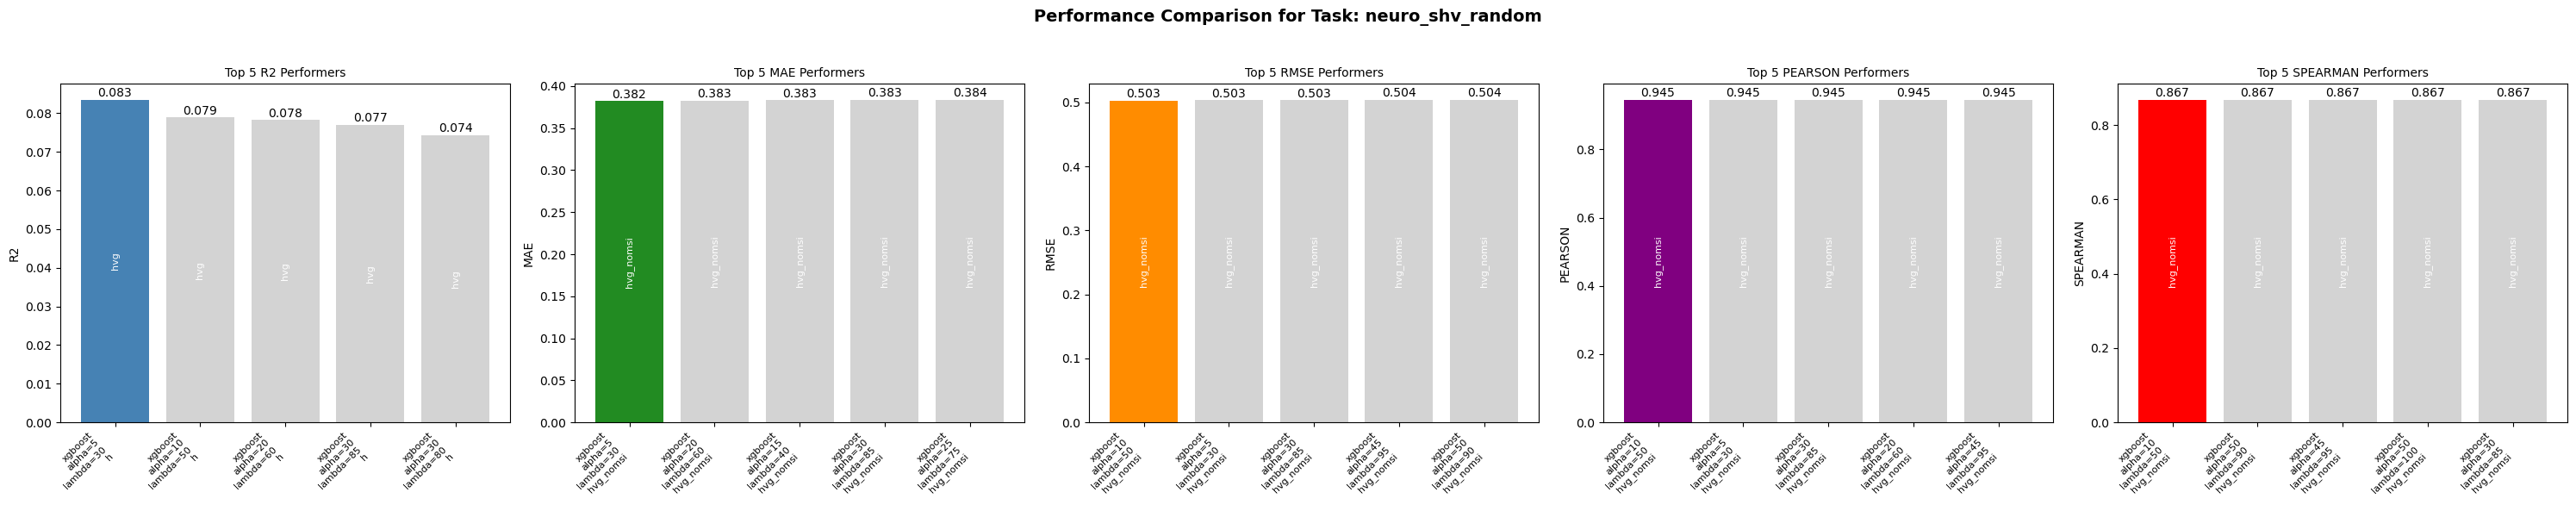

In [28]:
num_top_models = 5
# Define metrics and their optimization direction
metrics = ['r2', 'mae', 'rmse', 'pearson', 'spearman']
best_direction = {'r2': 'max', 'mae': 'min', 'rmse': 'min', 'pearson': 'max', 'spearman': 'max'}
highlight_colors = {'r2': 'steelblue', 'mae': 'forestgreen', 'rmse': 'darkorange', 'pearson': 'purple', 'spearman': 'red'}
default_color = 'lightgray'
text_color = 'white'

# Mapping featsel to a short label for the x-axis
featsel_map = {
    'hvg': 'h',
    'hvg_svd': 'hs',
    'hvg_svd_graph': 'hsg',
    'svd': 's',
    'svd_graph': 'sg',
    'hvg_nomsi': 'hvg_nomsi'
}

def get_method_label(method_name, featsel, method_params):
    """
    Returns a multi-line label for the x-axis in the form:
    
      method_name
      key1=val1
      key2=val2
      ...
      featsel_short
    
    If no method_params are provided, the label consists of just the method_name
    on the first line and the shortened featsel on the second line.
    """
    # Use the short featsel for the x-axis label
    featsel_short = featsel_map.get(featsel, featsel)
    
    # Convert method_params from string to dict if needed
    if isinstance(method_params, str):
        method_params = eval(method_params)
        
    if not method_params or not isinstance(method_params, dict):
        return f"{method_name}\n{featsel_short}"
    
    # Create a list of parameter strings and keep only the first two pairs
    param_parts = [f"{k}={v}" for k, v in method_params.items()]
    param_parts = param_parts[:2]
    param_str = "\n".join(param_parts)
    
    # Return the multi-line label
    return f"{method_name}\n{param_str}\n{featsel_short}"

# Prepare a list of columns to select
columns_to_select = ['method_name', 'featsel']
if 'method_params' in df.columns:
    columns_to_select.append('method_params')

# Create a dictionary to store top performers for each metric
top_performers = {}
for metric in metrics:
    if metric in df.columns:
        if best_direction[metric] == 'max':
            top_indices = df[metric].nlargest(num_top_models).index
        else:
            top_indices = df[metric].nsmallest(num_top_models).index
        selected_columns = columns_to_select + [metric]
        top_performers[metric] = df.loc[top_indices, selected_columns]

# Create a subplot for each metric
num_metrics = len(metrics)
fig, axes = plt.subplots(1, num_metrics, figsize=(6 * num_metrics, 6), squeeze=False)
fig.suptitle(f"Performance Comparison for Task: {task}", fontsize=14, fontweight='bold')

for i, metric in enumerate(metrics):
    ax = axes[0, i]
    if metric not in top_performers:
        continue

    top_df = top_performers[metric]
    method_labels = []
    original_featsel = []  # to annotate inside bars
    for _, row in top_df.iterrows():
        featsel_val = row['featsel']
        original_featsel.append(featsel_val)
        label = get_method_label(
            row['method_name'],
            featsel_val,
            row['method_params'] if 'method_params' in top_df.columns and pd.notna(row['method_params']) else None
        )
        method_labels.append(label)
    
    y_values = top_df[metric].values

    # Determine best value for highlighting
    if best_direction[metric] == 'max':
        overall_best_value = max(y_values)
    else:
        overall_best_value = min(y_values)
    colors = [highlight_colors[metric] if val == overall_best_value else default_color for val in y_values]

    bars = ax.bar(method_labels, y_values, color=colors)

    # Annotate metric value above each bar
    for bar, value in zip(bars, y_values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            value + (ax.get_ylim()[1] * 0.002),
            f"{value:.3f}",
            ha='center', va='bottom', fontsize=10, color='black'
        )
    # Annotate the original featsel inside each bar vertically
    for bar, featsel in zip(bars, original_featsel):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2,
            featsel,
            ha='center', va='center', fontsize=8, color=text_color, rotation=90
        )

    ax.set_title(f"Top {num_top_models} {metric.upper()} Performers", fontsize=10)
    ax.set_ylabel(metric.upper())
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax.set_xticklabels(method_labels, rotation=45, ha='right', fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(full_path, dpi=300, bbox_inches='tight')
print(f"Saved plot for {task}: {full_path}")
plt.show()
